# Define Paths

In [2]:
pathTo95TVA2DVASample = "localData/95TVA2DVASample/"
gold_standard_path = "localData/gold_standards/"
#ALL Pair sample can be found in https://drive.google.com/file/d/16J1yGQmjwUJu-k58x0DvIcRWy2r4OgsM/view?usp=sharing
allPairsSamplePath = "/home/leon/data/dataset_versioning/finalExperiments/allPairsSample/csvFiles/"

In [1]:
import role_matching.EvaluationHelperMethods as rm
import role_matching.MetricHelperMethods as mhm
import pandas as pd
from plotnine import *
from plotnine.data import *
from tabulate import tabulate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, precision_recall_curve
import numpy as np

df = pd.read_csv("localData/gold_standards/rgs.csv")
df2 = pd.read_csv("localData/gold_standards/dgs.csv")
df[["dataset","id1","id2"]].to_json("tmp/idInGoldStandards.csv",orient='records',lines=True)
df2[["dataset","id1","id2"]].to_json("tmp/idInGoldStandards2.csv",orient='records',lines=True)
#pd.concat(df[["dataset","id1","id2"]],df2[["dataset","id1","id2"]]).to_csv("tmp/idInGoldStandards.csv")

df["exactSequenceMatchPercentage"].to_csv("tmp/withoutExtraMissing.csv")
df2["exactSequenceMatchPercentage"].to_csv("tmp/withExtraMissing.csv")
print(len(df))
print(len(df2))
#print(df["exactSequenceMatchPercentage"] == df2["exactSequenceMatchPercentage"])

1500
1500


# Print Recall Table of RSG or DGS (Table 3):

In [22]:
import role_matching.EvaluationHelperMethods as rm
import role_matching.MetricHelperMethods as mhm
import pandas as pd
from plotnine import *
from plotnine.data import *
from tabulate import tabulate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, precision_recall_curve
import numpy as np

bucketAndDatasetToWeight, _ = rm.getBucketAndDatasetToWeight(pathTo95TVA2DVASample)

loadDiverseGoldStandard = True
if(loadDiverseGoldStandard):
    weighted = False
else:
    weighted = True
df = rm.readGoldStandardEvaluation(gold_standard_path,loadDiverseGoldStandard,pathTo95TVA2DVASample)
methodNames = ['isInExactMatchBlockingWithFilter','isInStrictBlockingNoDecayWithFilter','isInSequenceBlockingWithFilter','isInTSMBlockingWithFilter','isInValueSetBlockingWithFilter']

print("dataset","#TP","EM","CBRB","QSM","TSM","VSM",sep=",")
print("," + (",R"* (len(methodNames))))
dsNameList = []
for dsName in df['dataset'].unique():
    dsNameList.append(dsName)
dsNameList.sort()
for dsName in dsNameList:
    shortName = rm.datasetToAbbreviation[dsName]
    mhm.printRecallForNonparametrizedMethodsDF(shortName,df[df['dataset']==dsName],methodNames,weighted,bucketAndDatasetToWeight)
mhm.printRecallForNonparametrizedMethodsDF("Micro-AVG",df,methodNames,weighted,bucketAndDatasetToWeight)
mhm.printMacroAveragesRecall("Macro-AVG",df,methodNames,weighted,bucketAndDatasetToWeight)

dataset,#TP,EM,CBRB,QSM,TSM,VSM
,,R,R,R,R,R
ED,19,36,78,57,73,73
FO,44,88,93,90,93,95
MI,21,23,57,33,33,33
PO,33,45,60,54,60,63
TV,36,41,77,66,75,75
Micro-AVG,153,52,75,65,71,72
Macro-AVG,,47,73,60,67,68,

# Blocking Recall with Missing Values Plot:

In [ ]:
#getRecallForNonparametrizedMethodsDF

import role_matching.EvaluationHelperMethods as rm
import role_matching.MetricHelperMethods as mhm
import pandas as pd
from plotnine import *
from plotnine.data import *
from tabulate import tabulate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, precision_recall_curve
import numpy as np

bucketAndDatasetToWeight, _ = rm.getBucketAndDatasetToWeight(pathTo95TVA2DVASample)

goldStandardType = [True,False]
methodNames = ['isInExactMatchBlockingWithFilter','isInStrictBlockingNoDecayWithFilter','isInSequenceBlockingWithFilter','isInTSMBlockingWithFilter','isInValueSetBlockingWithFilter']
missingValuePercentages = [0.1,0.2,0.3,0.4,0.5]

for weighted in goldStandardType:
    if(loadDiverseGoldStandard):
        weighted = False
    else:
        weighted = True
    for missingValuePercentage in missingValuePercentages:
        df = rm.readGoldStandardEvaluation(gold_standard_path,loadDiverseGoldStandard,pathTo95TVA2DVASample)
        dsNameList = []
        for dsName in df['dataset'].unique():
            dsNameList.append(dsName)
        dsNameList.sort()
        for dsName in dsNameList:
            shortName = rm.datasetToAbbreviation[dsName]
            mhm.printRecallForNonparametrizedMethodsDF(shortName,df[df['dataset']==dsName],methodNames,weighted,bucketAndDatasetToWeight)
        mhm.printRecallForNonparametrizedMethodsDF("Micro-AVG",df,methodNames,weighted,bucketAndDatasetToWeight)
        mhm.printMacroAveragesRecall("Macro-AVG",df,methodNames,weighted,bucketAndDatasetToWeight)

# Print How Many True Positives could correct Data quality errors (Introduction):

In [23]:
df1 = rm.readGoldStandardEvaluation(gold_standard_path,True,pathTo95TVA2DVASample)
df2 = rm.readGoldStandardEvaluation(gold_standard_path,True,pathTo95TVA2DVASample)
dfAll = df1.append(df2)
dfAllTP = dfAll[dfAll['isSemanticRoleMatch']]
print(sum(dfAllTP["hasNonOverlap"]) / len(dfAllTP.index))
print(sum(~ dfAllTP["isInStrictBlockingNoDecay"]) / len(dfAllTP.index))
print(sum( dfAllTP["compatibilityPercentageNoDecay"] != 1.0) / len(dfAllTP.index))

0.32679738562091504
0.24183006535947713
0.24183006535947713


/tmp/ipykernel_83648/3615401763.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Gold Standard Overview (Figure 6)

In [24]:
# true positives:
dfTruePositivesOnly = df[df['isSemanticRoleMatch']]
tab = dfTruePositivesOnly.groupby(['dataset','bucket']).size()
print(tab)

dataset      bucket          
education    [0.0,0.7) (<70%)     2
             [0.7,1.0) (70%)      2
             [1.0,1.0] (full)    15
football     [0.7,1.0) (70%)      3
             [1.0,1.0] (full)    41
military     [0.0,0.7) (<70%)     5
             [0.7,1.0) (70%)      4
             [1.0,1.0] (full)    12
politics     [0.0,0.7) (<70%)     6
             [0.7,1.0) (70%)      7
             [1.0,1.0] (full)    20
tv_and_film  [0.0,0.7) (<70%)     3
             [0.7,1.0) (70%)      5
             [1.0,1.0] (full)    28
dtype: int64


/usr/local/lib/python3.8/dist-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/usr/local/lib/python3.8/dist-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


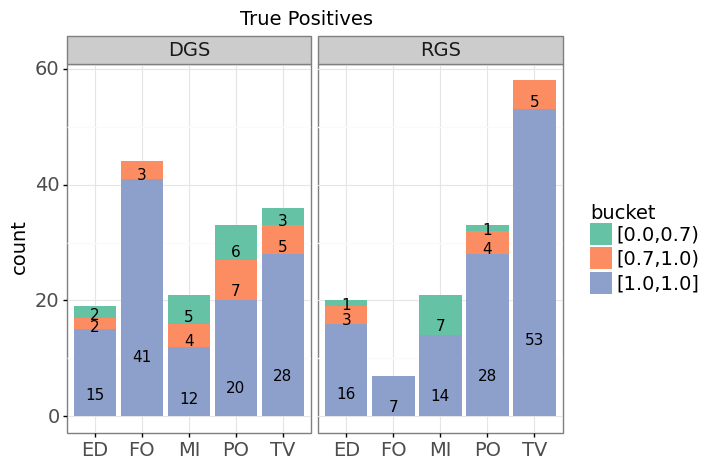

/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: exportedPlots/truePositivesBoth.png
/usr/local/lib/python3.8/dist-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/usr/local/lib/python3.8/dist-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [25]:
import role_matching.EvaluationHelperMethods as rm
loadDiverseGoldStandard=True # old or new gold standard

df1 = rm.readGoldStandardEvaluation(gold_standard_path,True,pathTo95TVA2DVASample)
df1["GS"] = "DGS"
df2 = rm.readGoldStandardEvaluation(gold_standard_path,False,pathTo95TVA2DVASample)
df2["GS"] = "RGS"

rm.addShortDataset(df1)
rm.addShortDataset(df2)
df1['bucket'] = df1['compatibilityPercentageNoDecay'].map(lambda x: rm.getShortGroup(x))
df2['bucket'] = df2['compatibilityPercentageNoDecay'].map(lambda x: rm.getShortGroup(x))

dfTruePositivesOnlyDF1 = df1[df1['isSemanticRoleMatch']]
dfTruePositivesOnlyDF2 = df2[df2['isSemanticRoleMatch']]
dfAllPositives = pd.concat([dfTruePositivesOnlyDF1,dfTruePositivesOnlyDF2])

cbPalette = ["#1b9e77", "#d95f02", "#7570b3", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

plot = ggplot(dfAllPositives,aes(x = 'datasetShort',fill="bucket")) +xlab("") + geom_bar(stat = "count") + facet_wrap("GS") + theme_bw() + ggtitle("True Positives") + theme(text=element_text(size=14)) +  geom_text(aes(label = "..count.."),position = position_stack(vjust = 0.25), stat = "count")+ scale_fill_brewer(type="qual",palette="Set2")
print(plot)
plot.save("exportedPlots/truePositivesBoth.png")


# Reduction Ratios of Non-Parametrized Methods (Table 4 and Figure 7)

In [32]:
import glob
import os
import pandas as pd
import role_matching.EvaluationHelperMethods as rm

#Statistics extracted from the sample drawing:
#We drew a sample from the set of all pairs until we had 1 million candidate pairs that had at least one timestamp-value agreement (1TVA)
#Having 1TVA is a prerequisite for a candidate pair in order to be considered
#We tracked how many candidate pairs did not have 1TVA per dataset in order to be able to compute the correct (estimated) reduction ratio
#allPairs denotes the number of all pairs per dataset, nMisses1TVA denotes how many pairs we had to skip (because they were not in 1TVA)
dsToBaseSampleStatistics = {
    "military": {"allPairs":4263199291,"nMisses1TVA":88280922,"nHits1TVA":1000000},
    "tv_and_film": {"allPairs":23657801481,"nMisses1TVA":50646743,"nHits1TVA":1000000},
    "politics": {"allPairs":2223411270,"nMisses1TVA":41041877,"nHits1TVA":1000000},
    "education": {"allPairs":2737889001,"nMisses1TVA":28997770,"nHits1TVA":1000000},
    "football": {"allPairs":53116323211,"nMisses1TVA":38466606,"nHits1TVA":1000000},
}

#these are the files that contain the statistics about the 1 million candidates in TVA (per dataset):
dfAllPairsSample = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', allPairsSamplePath + "/*.csv"))))

methodNames = ['isInValueSetBlockingWithFilter','isInStrictBlockingNoDecayWithFilter',"isInTSMBlockingNoWildcard","isInTSMBlockingWithFilter"]
rm.addFilteredBlockingMethods(dfAllPairsSample)
rm.addDVA2VA95Blocking(dfAllPairsSample)
#rm.addParametrizedScoresAsBooleanScores(dfAllPairsSample)
#print(dfAllPairsSample.columns)
groupedByDS = dfAllPairsSample.groupby("dataset")


dataset,#Total Pairs,EM,CBRB,QSM,TSM,VSM
education,2737889001,0.9999997666493209,0.9999987665749821,0.9999974331425303,0.9999956996803429,0.9999935328526087,
football,53116323211,0.9999997212833553,0.9999979476319804,0.9999633614301671,0.9999550252687044,0.999934197533986,
military,4263199291,0.9999994847723459,0.9999925403996164,0.9999904794889999,0.9999828070771939,0.9999821238405222,
politics,2223411270,0.9999991674967319,0.9999982636360408,0.9999964559146586,0.9999953141958909,0.9999948622655453,
tv_and_film,23657801481,0.9999999612753896,0.9999998063769481,0.9999990706093509,0.9999980250448707,0.9999968052196437,


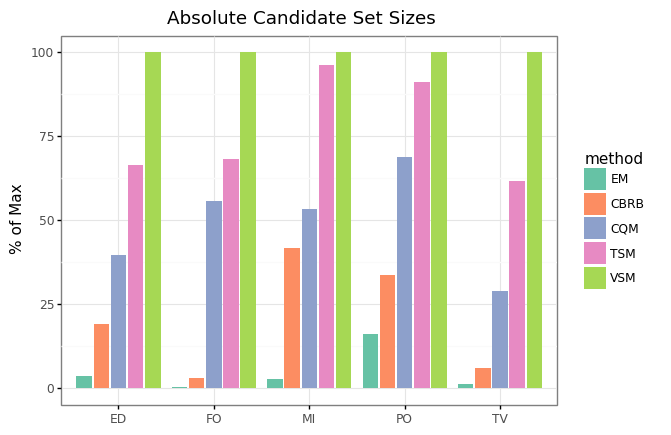

/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: exportedPlots/absoluteSetSizes.png


In [33]:
import role_matching.MetricHelperMethods as mhm

methodNames = ['isInExactMatchBlockingWithFilter','isInStrictBlockingNoDecayWithFilter','isInSequenceBlockingWithFilter','isInTSMBlockingWithFilter','isInValueSetBlockingWithFilter']

methodNamesToShortMethodName = {
    'isInExactMatchBlockingWithFilter':"EM",
    'isInStrictBlockingNoDecayWithFilter':"CBRB",
    'isInSequenceBlockingWithFilter':"CQM",
    'isInTSMBlockingWithFilter':"TSM",
    'isInValueSetBlockingWithFilter':"VSM"
}
print("dataset","#Total Pairs","EM","CBRB","QSM","TSM","VSM",sep=",")
finalDSRows = []
for (ds,thisDsAllPairsSample) in groupedByDS:
    nAllPairs = dsToBaseSampleStatistics[ds]["allPairs"]
    nHits1TVA = dsToBaseSampleStatistics[ds]["nHits1TVA"]
    nMisses1TVA = dsToBaseSampleStatistics[ds]["nMisses1TVA"]
    estimatedCountSVAPairs = round((nHits1TVA / (nHits1TVA+nMisses1TVA)) * nAllPairs)
    nHits90VA2DA = len(thisDsAllPairsSample[thisDsAllPairsSample['isInDVA2VA95Blocking']].index)
    nMisses90VA2DA = len(thisDsAllPairsSample[thisDsAllPairsSample['isInDVA2VA95Blocking']].index)
    print(ds,nAllPairs,sep=",",end=",")
    for method in methodNames:
        thisDF = thisDsAllPairsSample[thisDsAllPairsSample[method]]
        nHitsThisMethod = len(thisDF.index)
        nMissesThisMethod = nMisses1TVA + len(thisDsAllPairsSample.index) - nHitsThisMethod
        n,rrAll = mhm.getReductionRate(nHitsThisMethod,nMissesThisMethod,nAllPairs)
        finalDSRows.append({"dataset":ds,"method":methodNamesToShortMethodName[method],"n":n,"rr":rrAll})
        _,rr1VA = mhm.getReductionRate(nHitsThisMethod,len(thisDsAllPairsSample) - nHitsThisMethod,estimatedCountSVAPairs)
        rr95 = mhm.getReductionRateToOtherMethod(method,"isInDVA2VA95Blocking",thisDsAllPairsSample)
        print(rrAll,sep=",",end=",")
    print("")
finalDF = pd.DataFrame(finalDSRows)
#get maxima:
grouped = finalDF.groupby("dataset",).agg({'n':"max"}).to_dict("index")
finalDF["% of Max"] = finalDF.apply(lambda r: 100*(r["n"] / grouped[r["dataset"]]["n"]),axis=1)
finalDF['method'] = finalDF['method'].astype("category").cat.reorder_categories(['EM', 'CBRB', "CQM", "TSM", "VSM"])
rm.addShortDataset(finalDF)
plot = ggplot(finalDF,aes(x = 'datasetShort',fill="method",y="% of Max")) +xlab("") + geom_bar(position=position_dodge2(preserve = "single"),stat="identity") + ggtitle("Absolute Candidate Set Sizes") + theme(text=element_text(size=14)) + theme_bw() + scale_fill_brewer(type="qual",palette="Set2")
print(plot)
plot.save("exportedPlots/absoluteSetSizes.png")


# Reduction Ratio parametrized (Figure 8):

In [4]:
import glob
import os
import pandas as pd
import role_matching.EvaluationHelperMethods as rm
import role_matching.MetricHelperMethods as mhm

#same as above
dsToBaseSampleStatistics = {
    "military": {"allPairs":4263199291,"nMisses1TVA":88280922,"nHits1TVA":1000000},
    "tv_and_film": {"allPairs":23657801481,"nMisses1TVA":50646743,"nHits1TVA":1000000},
    "politics": {"allPairs":2223411270,"nMisses1TVA":41041877,"nHits1TVA":1000000},
    "education": {"allPairs":2737889001,"nMisses1TVA":28997770,"nHits1TVA":1000000},
    "football": {"allPairs":53116323211,"nMisses1TVA":38466606,"nHits1TVA":1000000},
}
allPairsSamplePath = "/home/leon/data/dataset_versioning/finalExperiments/allPairsSample/csvFilesNew/"
dfAllPairsParametrized = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', allPairsSamplePath+"*.csv"))))
print(dfAllPairsParametrized.columns)
groupedByDsParametrized = dfAllPairsParametrized.groupby("dataset")

Index(['dataset', 'id1', 'id2', 'RM_Gamma', 'CBRB_Beta', 'Relaxed_CBRB_Gamma',
       'hasTransitionOverlap'],
      dtype='object')


In [5]:
#oldGoldStandard = rm.readGoldStandardEvaluation(gold_standard_path,True,pathTo95TVA2DVASample)
#newGoldStandard = rm.readGoldStandardEvaluation(gold_standard_path,False,pathTo95TVA2DVASample)
pd.options.mode.chained_assignment = None

thresholds = []
for i in range(101):
    thresholds.append(i/100)
finalDFRows = []
methods = ["RM_Gamma","CBRB_Beta"]

methodsToRecallScoreNames = {
    "RM_Gamma":"exactSequenceMatchPercentage",
    "CBRB_Beta":"decayScore",
    "Relaxed_CBRB_Gamma":"compatibilityPercentageNoDecay"
}

methodsToPlotNames = {
    "RM_Gamma":"RM",
    "CBRB_Beta":"CBRB"
}

bucketAndDatasetToWeight, _ = rm.getBucketAndDatasetToWeight(pathTo95TVA2DVASample)

def getRecall(goldStandard, ds, scoreName, weighted, threshold):
    goldStandardThisDS = goldStandard[goldStandard["dataset"] == ds]
    goldStandardThisDS['currentScoreWithCutoff'] = ((goldStandardThisDS[scoreName] !=-1) & (goldStandardThisDS[scoreName]>=threshold))
    recallDGS = mhm.getRecall(goldStandardThisDS,'currentScoreWithCutoff',weighted,bucketAndDatasetToWeight)
    return recallDGS

goldStandardMissingValues=["0.5","0.6","0.7","0.8","normal"]


def readAllArtificialMissingValueGoldStandards(goldStandardMissingValues):
    goldStandardMap = {}
    basePath="localData/artificialMissingData/"
    for gs in goldStandardMissingValues:
        dgsPath = basePath + "dgs_cleaned_" + gs + ".csv"
        rgsPath = basePath + "rgs_cleaned_" + gs + ".csv"
        if gs == "normal":
            dgsGS = rm.readGoldStandardEvaluation(gold_standard_path,True,pathTo95TVA2DVASample) #TODO: think about whether we need to change the samples!
            rgsGS = rm.readGoldStandardEvaluation(gold_standard_path,False,pathTo95TVA2DVASample)
        else :
            dgsGS = rm.readGoldStandard(dgsPath,pathTo95TVA2DVASample)
            rgsGS = rm.readGoldStandard(rgsPath,pathTo95TVA2DVASample)
        goldStandardMap[("dgs",gs)]=dgsGS
        goldStandardMap[("rgs",gs)]=rgsGS
    return goldStandardMap



goldStandardMap = readAllArtificialMissingValueGoldStandards(goldStandardMissingValues)

for method in methods:
    print("processing",method)
    plotnameMethod = methodsToPlotNames[method]
    for t in thresholds:
    #print("Processing ",ds)
        print("processing",t)
        for gs in goldStandardMissingValues:
            print("processing",gs)
            avgN = 0
            avgRR = 0
            avgRecallDGS = 0
            avgRecallRGS = 0
            for(ds,dfGrouped) in groupedByDsParametrized:
                scoreName = methodsToRecallScoreNames[method]
                #recall old and new gold standard:
                dgsGS = goldStandardMap[("dgs",gs)]
                rgsGS = goldStandardMap[("rgs",gs)]
                recallDGS = getRecall(dgsGS,ds,scoreName,False,t)
                recallRGS = getRecall(rgsGS,ds,scoreName,True,t)
                #recall new gold standard:
                #reduction ratio:
                nAllPairs = dsToBaseSampleStatistics[ds]["allPairs"]
                nMisses1TVA = dsToBaseSampleStatistics[ds]["nMisses1TVA"]
                thisDF = dfGrouped[((dfGrouped[method]>=t) & (dfGrouped["hasTransitionOverlap"]))]
                nHitsThisMethod = len(thisDF.index)
                nMissesThisMethod = nMisses1TVA + len(dfGrouped.index) - nHitsThisMethod
                n,rrAll = mhm.getReductionRate(nHitsThisMethod,nMissesThisMethod,nAllPairs)
                if(rrAll>1):
                    print(n,rrAll,nHitsThisMethod,nMissesThisMethod,nAllPairs)
                avgN +=n
                avgRR += rrAll
                avgRecallDGS += recallDGS
                avgRecallRGS += recallRGS
                finalDFRows.append({"n":n,"rr":100*rrAll,"method":plotnameMethod,"threshold":t,"gs":gs,"dataset":ds,"recall":recallDGS,"GS":"DGS"})
                finalDFRows.append({"n":n,"rr":100*rrAll,"method":plotnameMethod,"threshold":t,"gs":gs,"dataset":ds,"recall":recallRGS,"GS":"RGS"})
            avgN = avgN / len(groupedByDsParametrized)
            avgRR = avgRR / len(groupedByDsParametrized)
            avgRecallDGS = avgRecallDGS / len(groupedByDsParametrized)
            avgRecallRGS = avgRecallRGS / len(groupedByDsParametrized)
            finalDFRows.append({"n":avgN,"rr":100*avgRR,"method":plotnameMethod,"threshold":t,"gs":gs,"dataset":"MAA","recall":avgRecallDGS,"GS":"DGS"})
            finalDFRows.append({"n":avgN,"rr":100*avgRR,"method":plotnameMethod,"threshold":t,"gs":gs,"dataset":"MAA","recall":avgRecallRGS,"GS":"RGS"})
finalDF = pd.DataFrame(finalDFRows)
print(finalDF.describe())

processing RM_Gamma
processing 0.0
processing 0.5
processing 0.6
processing 0.7
processing 0.8
processing normal
processing 0.01
processing 0.5
processing 0.6
processing 0.7
processing 0.8
processing normal
processing 0.02
processing 0.5
processing 0.6
processing 0.7
processing 0.8
processing normal
processing 0.03
processing 0.5
processing 0.6
processing 0.7
processing 0.8
processing normal
processing 0.04
processing 0.5
processing 0.6
processing 0.7
processing 0.8
processing normal
processing 0.05
processing 0.5
processing 0.6
processing 0.7
processing 0.8
processing normal
processing 0.06
processing 0.5
processing 0.6
processing 0.7
processing 0.8
processing normal
processing 0.07
processing 0.5
processing 0.6
processing 0.7
processing 0.8
processing normal
processing 0.08
processing 0.5
processing 0.6
processing 0.7
processing 0.8
processing normal
processing 0.09
processing 0.5
processing 0.6
processing 0.7
processing 0.8
processing normal
processing 0.1
processing 0.5
processing 

/usr/local/lib/python3.8/dist-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/usr/local/lib/python3.8/dist-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


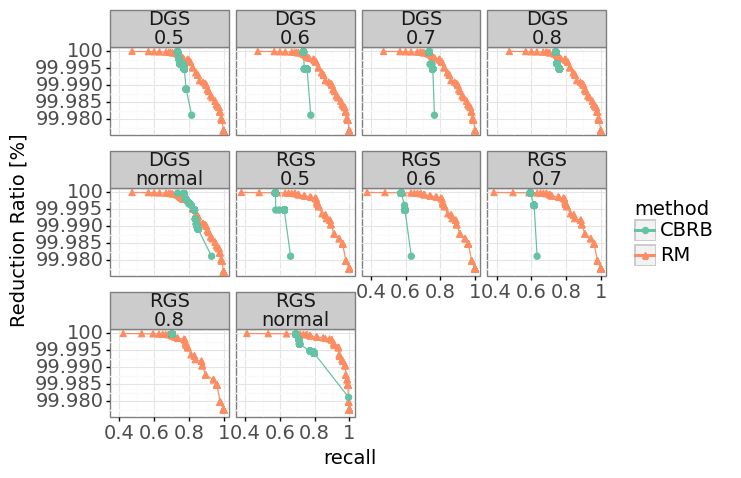

/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: exportedPlots/rrParametrized.png
/usr/local/lib/python3.8/dist-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/usr/local/lib/python3.8/dist-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [6]:
from plotnine import *

#we can never get worse in terms of reduction ratio if we choose less recall:
def createSmoothedRR(x, finalDF):
    gs = x["GS"]
    method = x["method"]
    dataset = x["dataset"]
    recall = x["recall"]
    synthData = x["gs"]
    sorted = finalDF[(finalDF["dataset"]==dataset) & (finalDF["method"]==method) & (finalDF["GS"]==gs)  & (finalDF["gs"]==synthData) & (finalDF["recall"]>=recall)].sort_values('rr',ascending=False)
    bestRR = sorted.iloc[0]["rr"]
    return bestRR

reductionRatioSmoothed = finalDF.apply(lambda x: createSmoothedRR(x,finalDF),axis=1)
finalDF["rrSmooth"] = reductionRatioSmoothed
finalDFMAA = finalDF[finalDF['dataset']=="MAA"]
plot = ggplot(finalDFMAA, aes(x ='recall', y='rrSmooth', color="method", shape = "method")) + geom_line() + geom_point(size=2) + theme_bw() + facet_wrap(["GS","gs"]) + theme(text=element_text(size=14)) + ylab("Reduction Ratio [%]") + scale_color_brewer(type="qual",palette="Set2")
print(plot)
plot.save("exportedPlots/rrParametrized.png")

#faceted by dataset:
# finalDFNOMAA = finalDF[finalDF['dataset']!="MAA"]
# finalDFNOMAADGS = finalDFNOMAA[finalDFNOMAA["GS"]=="DGS"]
# finalDFNOMAARGS = finalDFNOMAA[finalDFNOMAA["GS"]=="RGS"]
# plot = ggplot(finalDFNOMAADGS, aes(x ='recall', y='rrSmooth', color="method", shape = "method")) + geom_line() + geom_point(size=2) + theme_bw() + facet_wrap(["dataset"]) +ggtitle("DGS")+ theme(text=element_text(size=14)) + ylab("Reduction Ratio [%]") + theme(axis_text_x = element_text(angle=45)) + scale_color_brewer(type="qual",palette="Set2")
# print(plot)
# plot.save("exportedPlots/rrDGSAll.png")
#
# plot = ggplot(finalDFNOMAARGS, aes(x ='recall', y='rrSmooth', color="method", shape = "method")) + geom_line() + geom_point(size=2) + theme_bw() + facet_wrap(["dataset"]) +ggtitle("RGS")+ theme(text=element_text(size=14)) + ylab("Reduction Ratio [%]") + theme(axis_text_x = element_text(angle=45))
# print(plot)
# plot.save("exportedPlots/rrRGSAll.png")
#
# plot = ggplot(finalDFNOMAA, aes(x ='recall', y='rrSmooth', color="method", shape = "method")) + geom_line() + geom_point(size=2) + theme_bw() + facet_wrap(["dataset","GS"]) +ggtitle(ds)+ theme(text=element_text(size=14)) + ylab("Reduction Ratio [%]") + ylim(99.95,100)
# print(plot)
# for ds in finalDFNOMAA["dataset"].unique():
#     thisDF = finalDFNOMAA[finalDFNOMAA["dataset"]==ds]
#     plot = ggplot(thisDF, aes(x ='recall', y='rrSmooth', color="method", shape = "method")) + geom_line() + geom_point(size=2) + theme_bw() + facet_wrap("GS") +ggtitle(ds)+ theme(text=element_text(size=14)) + ylab("Reduction Ratio [%]")
#     print(plot)

In [8]:
#print(finalDFMAA[(finalDFMAA['recall']>=0.95) & (finalDFMAA['GS']=="RGS")])
for gs in goldStandardMissingValues:
    print(gs)
    print(finalDFMAA[(finalDFMAA['method']=="RM") & (finalDFMAA['recall']>=0.69) & (finalDFMAA['GS']=="RGS") & (finalDFMAA['gs']==gs)].iloc[-1])
    print(finalDFMAA[(finalDFMAA['method']=="RM") & (finalDFMAA['recall']>=0.73) & (finalDFMAA['GS']=="DGS") & (finalDFMAA['gs']==gs)].iloc[-1])

0.5
n            166290.729504
rr               99.999376
method                  RM
threshold             0.91
gs                     0.5
dataset                MAA
recall            0.704657
GS                     RGS
rrSmooth         99.999376
Name: 5471, dtype: object
n            214505.680438
rr               99.999267
method                  RM
threshold              0.9
gs                     0.5
dataset                MAA
recall            0.734799
GS                     DGS
rrSmooth         99.999267
Name: 5410, dtype: object
0.6
n            166290.729504
rr               99.999376
method                  RM
threshold             0.91
gs                     0.6
dataset                MAA
recall            0.704657
GS                     RGS
rrSmooth         99.999376
Name: 5483, dtype: object
n            214505.680438
rr               99.999267
method                  RM
threshold              0.9
gs                     0.6
dataset                MAA
recall            0.734